In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
df=pd.read_csv("heart_disease.csv",header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
1,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
2,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
3,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
4,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1


In [4]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [5]:
df.columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','condition']

In [14]:
df=df.drop(0,axis=0)

In [17]:
df.dtypes


age          object
sex          object
cp           object
trestbps     object
chol         object
fbs          object
restecg      object
thalach      object
exang        object
oldpeak      object
slope        object
ca           object
thal         object
condition    object
dtype: object

In [16]:
df['thal'].unique()

array(['0', '2', '1'], dtype=object)

In [18]:
len(df.loc[(df['ca']=='?')
    |
    (df['thal']=='?')])

0

In [19]:
df.loc[(df['ca']=='?')
    |
    (df['thal']=='?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition


In [20]:
len(df)

297

In [21]:
#deleting missing numbers
dff=df.loc[(df['ca']!='?')
    &
    (df['thal']!='?')]


In [22]:
len(df)

297

In [24]:
#data formating
X=dff.drop('condition',axis=1).copy()
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
1,69,1,0,160,234,1,2,131,0,0.1,1,1,0
2,69,0,0,140,239,0,0,151,0,1.8,0,2,0
3,66,0,0,150,226,0,0,114,0,2.6,2,0,0
4,65,1,0,138,282,1,2,174,0,1.4,1,1,0
5,64,1,0,110,211,0,2,144,1,1.8,1,0,0


In [25]:
y=dff['condition'].copy()
y.head()

1    0
2    0
3    0
4    1
5    0
Name: condition, dtype: object

In [26]:
X.dtypes

age         object
sex         object
cp          object
trestbps    object
chol        object
fbs         object
restecg     object
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
dtype: object

In [28]:
X['cp'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [29]:
y.unique()

array(['0', '1'], dtype=object)

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

clf_dt=DecisionTreeClassifier(random_state=42)
clf_dt=clf_dt.fit(X_train,y_train)

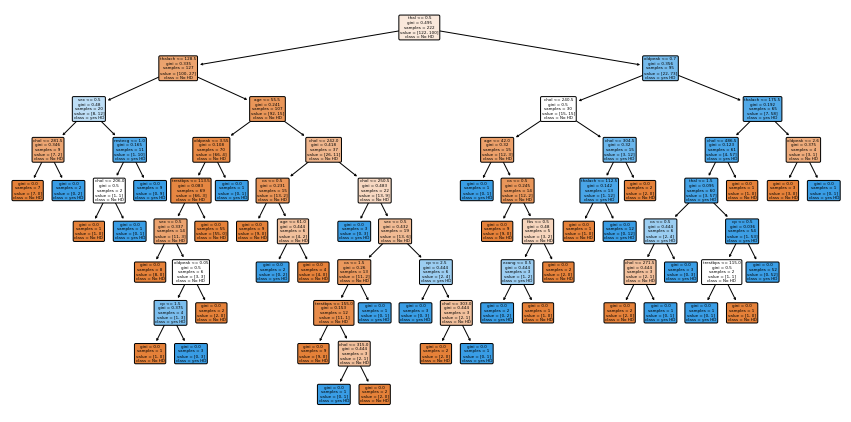

In [34]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
         filled=True,
         rounded=True,
         class_names=['No HD',"yes HD"],
          feature_names=X.columns);

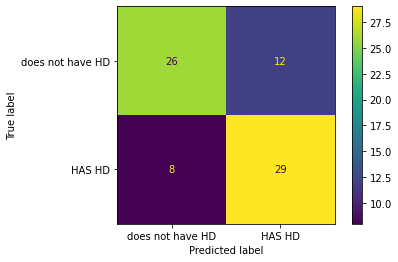

In [35]:
plot_confusion_matrix(clf_dt,X_test,y_test,display_labels=['does not have HD','HAS HD'])


In [36]:
#PRUNING TREE
path=clf_dt.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas=path.ccp_alphas  #extract diff values for alpha
ccp_alphas=ccp_alphas[:-1]  #exclude the maximum value for alpha

clf_dts=[]   #create an array to keep decission tree into

for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train,y_train)
    clf_dts.append(clf_dt)


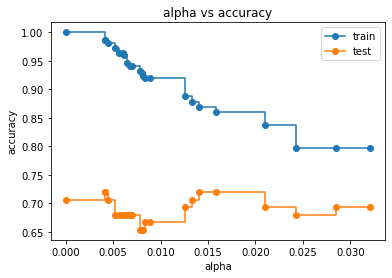

In [40]:
train_scores=[clf_dt.score(X_train,y_train) for clf_dt in clf_dts]
test_scores=[clf_dt.score(X_test,y_test) for clf_dt in clf_dts]
fig,ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("alpha vs accuracy")
ax.plot(ccp_alphas,train_scores,marker='o',label='train',drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker='o',label='test',drawstyle="steps-post")
ax.legend()
plt.show()

<AxesSubplot:xlabel='tree'>

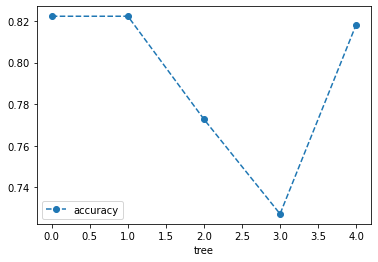

In [41]:
clf_dt=DecisionTreeClassifier(random_state=42,ccp_alpha=0.016)
scores=cross_val_score(clf_dt,X_train,y_train,cv=5)
dt=pd.DataFrame(data={'tree':range(5),'accuracy':scores})
dt.plot(x='tree',y='accuracy',marker='o',linestyle='--')
